<a href="https://colab.research.google.com/github/k1hector159/REDES-NEURONALES/blob/YESICA/RENDICION_ACADEMICO_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***TRABAJO DE COMPUTACION EN LA NUBE***

PANDAS NOS SIRVE PARA PODER GESTIONAR BASE DE DATOS(CARGAR,MODIFICAR)

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split

LA FUNCION READ_CSV ES PARA LEER NUESTROS DATASET

In [69]:
train=pd.read_csv('/content/student-mat-pass-or-fail.csv')

***NOS MOSTRARA LAS 5 PRIMERAS FILAS DEL*** 

In [70]:
train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
0,1,1,18,1,0,0,4,4,2,2,...,3,4,1,1,3,6,5,6,6,0
1,1,1,17,1,0,1,1,1,1,2,...,3,3,1,1,3,4,5,5,6,0
2,1,1,15,1,1,1,1,1,1,2,...,3,2,2,3,3,10,7,8,10,1
3,1,1,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,1
4,1,1,16,1,0,1,3,3,1,2,...,3,2,1,2,5,4,6,10,10,1


VERIFICAMOS QUE CAMPOS TIENEN VACIOS O NULL

In [71]:
train.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
pass          0
dtype: int64

TOMAMOS LAS COLUMNAS QUE TIENEN MAS IMPORTACIA PARA LA RED NEURONAL

In [72]:
train=train[['sex','age','studytime','internet','absences','G1','G2','G3','pass']]
train.head()

,sex,age,studytime,internet,absences,G1,G2,G3,pass
0,1,18,2,0,6,5,6,6,0
1,1,17,2,1,4,5,5,6,0
2,1,15,2,1,10,7,8,10,1
3,1,15,3,1,2,15,14,15,1
4,1,16,2,0,4,6,10,10,1


DROPNA QUIERE DECIRM QUE ELIMINAREMOS TODOS LOS VACIOS O NULOS

DROPNA_DUPLICATES ELIMINAREMOS TODOS LOS DATOS DUPLICADOS

In [73]:
# Este elimina las filas que tengan algun nulo
train=train.dropna() 
#Luego eliminados los duplicados
train=train.drop_duplicates()
train

,sex,age,studytime,internet,absences,G1,G2,G3,pass
0,1,18,2,0,6,5,6,6,0
1,1,17,2,1,4,5,5,6,0
2,1,15,2,1,10,7,8,10,1
3,1,15,3,1,2,15,14,15,1
4,1,16,2,0,4,6,10,10,1
...,...,...,...,...,...,...,...,...,...
390,0,20,2,0,11,9,9,9,0
391,0,17,1,1,3,14,16,16,1
392,0,21,1,0,3,10,8,7,0
393,0,18,1,1,0,11,12,10,1


In [74]:
trainDatax=train[['sex','age','studytime','internet','absences','G1','G2','G3']]
trainDatay=train[['pass']]
print(trainDatay.head(),"\n", trainDatax.head())
train.head()

   pass
0     0
1     0
2     1
3     1
4     1 
    sex  age  studytime  internet  absences  G1  G2  G3
0    1   18          2         0         6   5   6   6
1    1   17          2         1         4   5   5   6
2    1   15          2         1        10   7   8  10
3    1   15          3         1         2  15  14  15
4    1   16          2         0         4   6  10  10


,sex,age,studytime,internet,absences,G1,G2,G3,pass
0,1,18,2,0,6,5,6,6,0
1,1,17,2,1,4,5,5,6,0
2,1,15,2,1,10,7,8,10,1
3,1,15,3,1,2,15,14,15,1
4,1,16,2,0,4,6,10,10,1


Trabajamos las ausencias para
Facilitarnos encontrar patrones para RN

In [75]:
#colocamos los intervalos que son convenientes 
trainDatax['absences']=pd.cut(trainDatax['absences'],[0,15,30,45,60,75])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
trainDatax['G1']=pd.cut(trainDatax['G1'],[0,10,20])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
trainDatax['G2']=pd.cut(trainDatax['G2'],[0,10,20])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
trainDatax['G3']=pd.cut(trainDatax['G3'],[0,10,20])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
trainDatax.head()

,sex,age,studytime,internet,absences,G1,G2,G3
0,1,18,2,0,"(0, 15]","(0, 10]","(0, 10]","(0, 10]"
1,1,17,2,1,"(0, 15]","(0, 10]","(0, 10]","(0, 10]"
2,1,15,2,1,"(0, 15]","(0, 10]","(0, 10]","(0, 10]"
3,1,15,3,1,"(0, 15]","(10, 20]","(10, 20]","(10, 20]"
4,1,16,2,0,"(0, 15]","(0, 10]","(0, 10]","(0, 10]"


In [80]:
#Categorizacion de los datos
from pandas.core.arrays import categorical
trainDatax.loc[:,'absences'],categoriaAbs=pd.factorize(trainDatax['absences'],sort=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [81]:
trainDatax.loc[:,'G1'],categoriaG1=pd.factorize(trainDatax['G1'],sort=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [82]:
trainDatax.loc[:,'G2'],categoriaG2=pd.factorize(trainDatax['G2'],sort=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [83]:
trainDatax.loc[:,'G3'],categoriaG3=pd.factorize(trainDatax['G3'],sort=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [84]:
trainDatax.head()

,sex,age,studytime,internet,absences,G1,G2,G3
0,1,18,2,0,0,0,0,0
1,1,17,2,1,0,0,0,0
2,1,15,2,1,0,0,0,0
3,1,15,3,1,0,1,1,1
4,1,16,2,0,0,0,0,0


In [85]:
#Normalizar los datos
from sklearn.preprocessing import StandardScaler

In [88]:
scaler=StandardScaler()
scaler.fit(trainDatax)
print(scaler.mean_)

[ 0.52429668 16.69309463  2.03580563  0.83120205 -0.18414322  0.51150895
  0.48081841  0.43478261]


In [89]:
trainDatax=scaler.fit_transform(trainDatax)
trainDatax

array([[ 0.95253193,  1.02377472, -0.04250198, ..., -1.02328902,
        -0.85516408, -0.6592119 ],
       [ 0.95253193,  0.24041676, -0.04250198, ..., -1.02328902,
        -0.85516408, -0.6592119 ],
       [ 0.95253193, -1.32629914, -0.04250198, ..., -1.02328902,
        -0.85516408, -0.6592119 ],
       ...,
       [-1.04983358,  3.37384857, -1.22952157, ..., -1.02328902,
        -0.85516408, -0.6592119 ],
       [-1.04983358,  1.02377472, -1.22952157, ...,  0.97724101,
         0.92339526, -0.6592119 ],
       [-1.04983358,  1.80713267, -1.22952157, ..., -1.02328902,
        -0.85516408, -0.6592119 ]])

In [90]:
from sklearn.decomposition import PCA

In [91]:
pca = PCA(n_components=8)
pca.fit(trainDatax)
print(pca.explained_variance_ratio_)  

[0.325263   0.16361583 0.14283477 0.12956026 0.10641554 0.07891459
 0.03576244 0.01763356]


In [92]:
print(trainDatax, trainDatay)

[[ 0.95253193  1.02377472 -0.04250198 ... -1.02328902 -0.85516408
  -0.6592119 ]
 [ 0.95253193  0.24041676 -0.04250198 ... -1.02328902 -0.85516408
  -0.6592119 ]
 [ 0.95253193 -1.32629914 -0.04250198 ... -1.02328902 -0.85516408
  -0.6592119 ]
 ...
 [-1.04983358  3.37384857 -1.22952157 ... -1.02328902 -0.85516408
  -0.6592119 ]
 [-1.04983358  1.02377472 -1.22952157 ...  0.97724101  0.92339526
  -0.6592119 ]
 [-1.04983358  1.80713267 -1.22952157 ... -1.02328902 -0.85516408
  -0.6592119 ]]      pass
0       0
1       0
2       1
3       1
4       1
..    ...
390     0
391     1
392     0
393     1
394     0

[391 rows x 1 columns]


In [93]:
# Entrenar la RN
import numpy as np
from sklearn.model_selection import train_test_split

In [94]:
trainDatay=trainDatay.to_numpy()
x_train, x_test, y_train, y_test= train_test_split(trainDatax, trainDatay, test_size=0.3)

In [95]:
print(x_train[0:5], x_test[0:5], y_train[0:5], y_test[0:5])

[[-1.04983358  1.02377472  1.14451761  0.45064057 -1.23461776  0.97724101
   0.92339526  0.85697547]
 [ 0.95253193  0.24041676  2.3315372   0.45064057 -1.23461776  0.97724101
   0.92339526  0.85697547]
 [-1.04983358 -0.54294119 -0.04250198  0.45064057  1.79193737 -1.02328902
  -0.85516408 -0.6592119 ]
 [-1.04983358 -0.54294119 -0.04250198  0.45064057  0.27865981 -1.02328902
  -0.85516408 -0.6592119 ]
 [ 0.95253193  0.24041676 -0.04250198  0.45064057 -1.23461776 -1.02328902
  -0.85516408 -2.17539927]] [[-1.04983358  1.80713267 -0.04250198  0.45064057  0.27865981  0.97724101
   0.92339526  0.85697547]
 [-1.04983358 -0.54294119 -1.22952157  0.45064057 -1.23461776  0.97724101
   0.92339526  0.85697547]
 [-1.04983358 -0.54294119 -1.22952157  0.45064057 -1.23461776  0.97724101
   0.92339526  0.85697547]
 [ 0.95253193  0.24041676 -1.22952157  0.45064057  1.79193737  0.97724101
   0.92339526  0.85697547]
 [-1.04983358  0.24041676 -1.22952157  0.45064057  1.79193737 -1.02328902
  -0.85516408 -0

In [96]:
#import numpy as np

def sigmoide(x):
  return (1.0/(1.0+np.exp(-x)))
def derivada(x):
  return sigmoide(x)*(1.0-sigmoide(x))

def neurona(entrada, pesosCO1, tendenciasC01, pesosCO2, tendenciasCO2, pesosCO3, tendenciasCO3, pesosCS, tendenciasCS):
  entradaNetaC1=np.dot(pesosCO1, np.transpose(entrada))-tendenciasC01
  salidaC1=sigmoide(entradaNetaC1)

  entradaNetaC2 = np.dot(pesosCO2,salidaC1)-tendenciasCO2
  salidaC2=sigmoide(entradaNetaC2)

  entradaNetaC3 = np.dot(pesosCO3,salidaC2)-tendenciasCO3
  salidaC3=sigmoide(entradaNetaC3)

  entradaNetaCS = np.dot(pesosCS,salidaC3)-tendenciasCS
  salida=sigmoide(entradaNetaCS)

  return salida, entradaNetaCS, entradaNetaC3, entradaNetaC2, entradaNetaC1

def backpropagation(entradas, salidas,factorAprendizaje, error, max_it, alpha, rho, neuronasC1, neuronasC2, neuronasC3):

  pesosCO1=2*np.random.rand(neuronasC1,entradas.shape[1])-1
  tendenciasC1=2*np.random.rand(neuronasC1)-1

  pesosCO2=2*np.random.rand(neuronasC2,neuronasC1)-1
  tendenciasC2=2*np.random.rand(neuronasC2)-1

  pesosCO3=2*np.random.rand(neuronasC3,neuronasC2)-1
  tendenciasC3=2*np.random.rand(neuronasC3)-1

  pesosCS = 2*np.random.rand(neuronasC3)-1
  tendenciasCS=2*np.random.rand(1)-1
  it=0
  errorVec=[]
  errorAnt=float('inf')
  while(it<max_it):
    it+=1
    errorIt=0
    for i in range(0, entradas.shape[0]):
      ent=entradas[i]
      t=salidas[i]
      y,entradaNetaCS, entradaNetaC3, entradaNetaC2, entradaNetaC1=neurona(
          ent, pesosCO1, tendenciasC1, pesosCO2, tendenciasC2,pesosCO3, tendenciasC3, pesosCS, tendenciasCS
        )

      errorIt+=np.power(t-y,2)/2.0

    errorVec.append(errorIt)
    for i in range(0, entradas.shape[0]):
      ent=entradas[i]
      t=salidas[i]
      y, entradaNetaCS, entradaNetaC3, entradaNetaC2, entradaNetaC1 = neurona(
          ent, pesosCO1, tendenciasC1, pesosCO2, tendenciasC2, pesosCO3, tendenciasC3, pesosCS, tendenciasCS
      )


      errorCS=(t-y)*derivada(entradaNetaCS)


      errorC3=0
      for j in range(0,pesosCS.shape[0]):
        errorC3+=pesosCS[j]*errorCS*derivada(entradaNetaC3[j])

      errorC2=0
      for j in range(0,pesosCO3.shape[0]):
        for k in range(0, pesosCO3.shape[1]):
          errorC2 += pesosCO3[j][k]*errorC3*derivada(entradaNetaC2[k])

      errorC1=0
      for j in range(0, pesosCO2.shape[0]):
        for k in range(0, pesosCO2.shape[1]):
          errorC1 += pesosCO2[j][k]*errorC2*derivada(entradaNetaC1[k])


      for j in range(0, pesosCS.shape[0]):
        pesosCS[j]+=factorAprendizaje*errorCS*entradaNetaCS

      for j in range(0,tendenciasCS.shape[0]):
        tendenciasCS[j]+=factorAprendizaje*errorCS*(-1)
      

      for j in range(0, pesosCO3.shape[0]):
        for k in range(0, pesosCO3.shape[1]):
          pesosCO3[j][k]+=factorAprendizaje*errorC3*entradaNetaC3[j]

      for j in range(0, tendenciasC3.shape[0]):
        tendenciasC3[j]+=factorAprendizaje*errorC3*(-1)

      for j in range(0, pesosCO2.shape[0]):
        for k in range(0, pesosCO2.shape[1]): 
          pesosCO2[j][k]+=factorAprendizaje*errorC2*entradaNetaC2[j]

      for j in range(0, tendenciasC2.shape[0]):
        tendenciasC2[j]+=factorAprendizaje*errorC2*(-1)


      for j in range(0, pesosCO1.shape[0]):
        for k in range(0, pesosCO1.shape[1]):
          pesosCO1[j][k]+=factorAprendizaje*errorC1*entradaNetaC1[j]

      for j in range(0,tendenciasC1.shape[0]):
        tendenciasC1[j]+=factorAprendizaje*errorC1*(-1)

    if errorIt < errorAnt:
      factorAprendizaje*=alpha
  else:
    factorAprendizaje*=rho
  errorAnt=errorIt
  return pesosCS, pesosCO1, pesosCO2, pesosCO3, tendenciasC1, tendenciasC2, tendenciasC3, tendenciasCS, errorVec

In [101]:
# parametros
neuronasC1=3
neuronasC2=7 #2n+1 Regla de Kolmorogov
neuronasC3=2
factorAprendizaje=0.5
alpha=1.05 # aumentar el factor de aprendizaje 
rho=0.95 #disminuir el factor de aprendizaje
max_it=200
error=0.5

Error de entrenamiento

In [103]:

pesosCS, pesosCO1, pesosCO2, pesosCO3, tc1, tc2, tc3, tcs, errorVec=backpropagation(x_train,
 y_train,factorAprendizaje, error, max_it, alpha, rho, neuronasC1, neuronasC2, neuronasC3)

Text(0.5, 1.0, 'Error de entrenamiento')

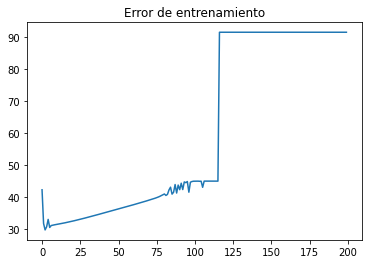

In [104]:
import matplotlib.pyplot as plt
plt.plot(errorVec)
plt.title("Error de entrenamiento")

In [105]:
#YESICA
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(neuronasC1, neuronasC2),random_state=1)
clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 7), random_state=1,
              solver='lbfgs')